In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split

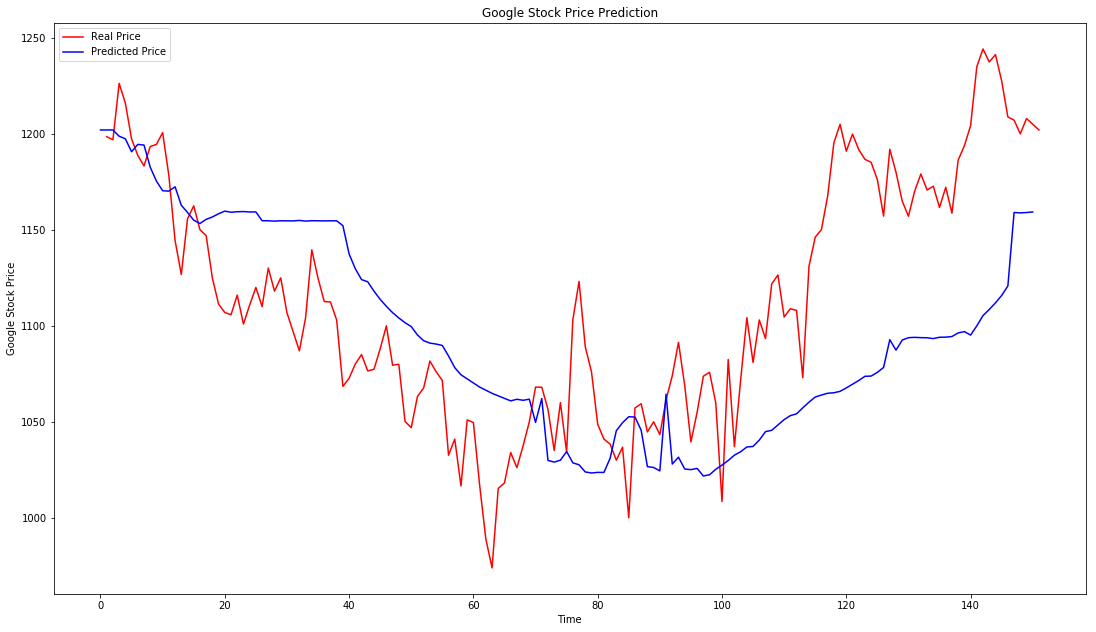

In [8]:
data = pd.read_csv('GoogleStocks.csv')
data = data.iloc[1:]
p = ['close', 'volume', 'open', 'high', 'low']
for i in p:
        data[i] = data[i].replace(',','', regex=True).astype(float)
data = data.sort_values(by='date')
data['Avg'] = (data['high']+data['low'])/2
data = data.sort_values(by='date')
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=False)
predicted_open_prices = []
actual_open_prices = []
def compute_all_possible_outcomes(data):
    mu      = data.mean()
    sigma   = data.std()
    out = (sigma * np.random.standard_normal(555)) + mu         
    return out

def prediction(day_index,time_step,data):
    previous_data_start_index = max(0, day_index - time_step)
    previous_data_end_index   = max(1, day_index - 1)
    previous_data = data.iloc[previous_data_start_index: previous_data_end_index]
    open_     = np.array(previous_data.loc[:,'open'])
    volume    = np.array(previous_data.loc[:,'volume'])
    avg_price = np.array(previous_data.loc[:,'Avg'])
    previous_features = np.column_stack((avg_price, volume, open_))
    possible_outcomes = compute_all_possible_outcomes(previous_features[:,-1])
    outcome_score = []
    for possible_outcome in possible_outcomes:
        total_data = np.column_stack((previous_features[:,:-1], [possible_outcome]*previous_features.shape[0]))
        outcome_score.append(hmm.score(total_data))
    most_probable_outcome = possible_outcomes[np.argmax(outcome_score)]
    return most_probable_outcome

def predict_close(days,time_step,data):
    predicted_open_prices = []
    for day_index in range(days):
        predicted_open_prices.append(prediction(day_index,time_step,data))
    days = np.array(data['date'])
    actual_open_prices = data['open']
def model_train(data):
    open_     = np.array(data.loc[:,'open'])
    volume    = np.array(data.loc[:,'volume'])
    avg_price = np.array(data.loc[:,'Avg'])
    feature_vector = np.column_stack((avg_price, volume, open_))
    hmm.fit(feature_vector)
    predict_close(len(data_test),time_step,data_test)

time_step = 20
hmm = GaussianHMM(n_components=12)
model_train(data)


plt.plot(actual_open_prices,color = 'red', label = 'Real Price')
plt.plot(predicted_open_prices, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
